In [154]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [155]:
#Read input file and understand the data
# "default" is my dependent variable

vaDF=pd.read_csv('german_credit.csv')
vaDF.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [156]:
vaDF.shape

(1000, 21)

In [157]:
vaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [158]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [159]:
obj_columns=[]
for cl in vaDF.columns:
    if(vaDF[cl].dtypes=='object'):
        obj_columns.append(cl)
        
vaDF_d=pd.get_dummies(vaDF,columns=obj_columns)
vaDF_d.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [160]:
vaDF_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

In [161]:
corr_matrix=vaDF_d.corr().abs()
corr_matrix

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,0.091127,0.045732,0.003015,0.119581,0.258333,...,0.134589,0.092785,0.040559,0.013559,0.005951,2.182179e-02,0.036466,0.036466,0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,0.036136,0.011284,0.023834,0.089452,0.022244,...,0.075169,0.064417,0.147515,0.055010,0.044043,1.812030e-01,0.164718,0.164718,0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,0.020912,...,0.117497,0.024611,0.319715,0.092636,0.027969,1.617570e-01,0.276995,0.276995,0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,0.271316,1.000000,0.049302,0.058266,0.021669,0.071207,0.051906,0.046917,...,0.049922,0.091373,0.042805,0.042623,0.087834,5.723714e-02,0.014413,0.014413,0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.055817,0.088350,...,0.297547,0.167285,0.004952,0.000657,0.034545,9.064820e-03,0.095359,0.095359,0.054097,0.054097
age,0.091127,0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.078121,0.011162,...,0.006553,0.212620,0.127605,0.148283,0.059954,4.371237e-02,0.145259,0.145259,0.006151,0.006151
credits_this_bank,0.045732,0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.052662,0.029195,...,0.041386,0.058070,0.010906,0.001471,0.059582,1.039203e-02,0.065553,0.065553,0.009717,0.009717
people_under_maintenance,0.003015,0.023834,0.017142,0.071207,0.042643,0.118201,0.109667,1.000000,0.066643,0.059041,...,0.027579,0.063033,0.015096,0.106737,0.007723,1.450658e-01,0.014753,0.014753,0.077071,0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,0.051906,0.055817,0.078121,0.052662,0.066643,1.000000,0.372670,...,0.001012,0.000888,0.051999,0.067587,0.047382,1.804077e-02,0.015276,0.015276,0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,0.020912,0.046917,0.088350,0.011162,0.029195,0.059041,0.372670,1.000000,...,0.125705,0.093310,0.022427,0.002879,0.000428,2.354213e-02,0.067149,0.067149,0.057751,0.057751


In [162]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#highly correlated variables
h=0;
hcv=pd.DataFrame(columns=['column1', 'column2','correlation value'])
for c in upper.columns:
    for i in upper.index:
        if(upper[i][c]>0.8 and i!=c):
            hcv.loc[h,'column1']=i;
            hcv.loc[h,'column2']=c;
            hcv.loc[h,'correlation value']=upper[i][c];
            h=h+1;
hcv

,column1,column2,correlation value
0,other_installment_plans_none,other_installment_plans_bank,0.840546
1,"telephone_yes, registered under the customers ...",telephone_none,1
2,foreign_worker_yes,foreign_worker_no,1


### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [163]:
# splitting data into training and test set for independent attributes


train_set = vaDF_d.head(700) # Up to the last initial training set row
test_set = vaDF_d.tail(300) # Past the last initial training set row

# capture the target column ("default") into separate vectors for training set and test set
train_labels = train_set.pop("default")
test_labels = test_set.pop("default")


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [184]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,criterion="entropy",random_state=9999,n_jobs=2)
rfcl = rfcl.fit(train_set, train_labels)


In [185]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.76

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [186]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels,test_pred)

conf_matrix

array([[192,  15],
       [ 57,  36]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

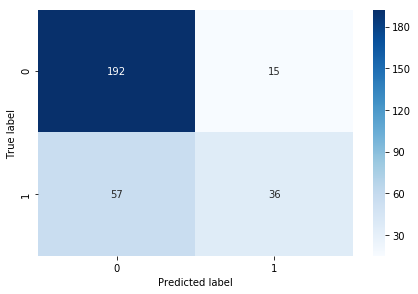

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Q6 Show the list of the features importance( 1 Marks)

In [188]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = train_set.columns))

                                                         Imp
duration_in_month                                   0.075172
credit_amount                                       0.098818
installment_as_income_perc                          0.036468
present_res_since                                   0.034132
age                                                 0.079416
credits_this_bank                                   0.018156
people_under_maintenance                            0.010948
account_check_status_0 <= ... < 200 DM              0.020012
account_check_status_< 0 DM                         0.026873
account_check_status_>= 200 DM / salary assignm...  0.007893
account_check_status_no checking account            0.054464
credit_history_all credits at this bank paid ba...  0.010154
credit_history_critical account/ other credits ...  0.019235
credit_history_delay in paying off in the past      0.009859
credit_history_existing credits paid back duly ...  0.014402
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [189]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [190]:
# Use below values
num_folds = 10
seed = 77

In [171]:
#Validate the Random Forest model build above using k fold

In [200]:
X=vaDF_d.drop('default',axis=1);
y=vaDF_d['default'];
scores = []
rfcl_k = RandomForestClassifier(criterion="entropy",random_state=77,n_jobs=2)

kfold=KFold(n_splits=num_folds,random_state=seed)

for train_index, test_index in kfold.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    rfcl_k.fit(X_train, y_train)
    scores.append(rfcl.score(X_test, y_test))
    cross_val_predict(rfcl_k, X, y, cv=10)


In [173]:
#Calculate Mean score

In [201]:
np.mean(scores)

0.9279999999999999

In [175]:
# Calculate score standard deviation using std()

In [202]:
(pd.Series(scores)).std()

0.11659998094148881

# Q8 Print the confusion matrix( 1 Marks)

In [206]:
from sklearn.model_selection  import cross_val_predict
y_k_predict=cross_val_predict(rfcl_k, X, y, cv=10)
conf_matrix_k = confusion_matrix(y,y_k_predict)





In [207]:
#conf_matrix
print(conf_matrix_k)

[[636  64]
 [190 110]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [204]:
accuracy_score(y,y_k_predict)

0.746

In [205]:
from sklearn.metrics import classification_report

print(classification_report(y,y_k_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       700
           1       0.63      0.37      0.46       300

   micro avg       0.75      0.75      0.75      1000
   macro avg       0.70      0.64      0.65      1000
weighted avg       0.73      0.75      0.72      1000



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [178]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [179]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'rfm' is not defined

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())